## Graphwalk Model

230513: Parse the model info and build a plot of the results

Q's @ Keiland: kwcooper@uci.edu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Load in the model metadata
m_path = f"./torchweights_v2/weights_meta.csv"
w_meta = pd.read_csv(m_path)
w_meta.head()

,I,task,L2,1,2,3,4,end_loss,mID,weight_name,path
0,0,I,6,44.811321,50.000000,45.454545,78.571429,0.0114,0,I_6_0.pt,/home/k/DATA/graphwalk/torchweights_v2/I_6_0.pt
1,1,I,6,55.760369,50.434783,61.290323,30.000000,0.0465,1,I_6_1.pt,/home/k/DATA/graphwalk/torchweights_v2/I_6_1.pt
2,2,I,6,47.008547,44.859813,29.787234,16.666667,0.0387,2,I_6_2.pt,/home/k/DATA/graphwalk/torchweights_v2/I_6_2.pt
3,3,I,6,58.750000,57.731959,74.545455,100.000000,0.0530,3,I_6_3.pt,/home/k/DATA/graphwalk/torchweights_v2/I_6_3.pt
4,4,I,6,51.082251,62.500000,44.897959,40.000000,0.0233,4,I_6_4.pt,/home/k/DATA/graphwalk/torchweights_v2/I_6_4.pt


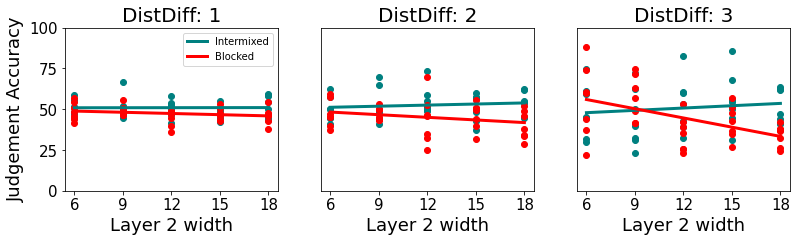

In [6]:

# Grab the two groups
w_i = w_meta[w_meta['task'] == 'I']
w_b = w_meta[w_meta['task'] == 'B']

dists_l = [1,2,3]
plt.figure(figsize=(13,3))
for i in dists_l:
    plt.subplot(1, len(dists_l), i)
    
    # Plot the accuracy scores
    acci = w_i[['L2', str(i)]].to_numpy()
    plt.scatter(acci[:,0], acci[:,1], color='teal')

    accb = w_b[['L2', str(i)]].to_numpy()
    plt.scatter(accb[:,0], accb[:,1], color='r')

    # find line of best fit
    ai, bi = np.polyfit(acci[:,0], acci[:,1], 1)
    ab, bb = np.polyfit(accb[:,0], accb[:,1], 1)
    plt.plot(acci[:,0], ai*acci[:,0]+bi, color='teal', linewidth=3, label='Intermixed')
    plt.plot(accb[:,0], ab*accb[:,0]+bb, color='r', linewidth=3, label='Blocked')
    
    # Make it look pretty now
    plt.title(f'DistDiff: {i}', size=20)

    if i == 1:
        plt.ylabel('Judgement Accuracy', size=18)
        plt.yticks([0, 25, 50, 75, 100], size=15)
        plt.legend()
    else:
        plt.yticks([])
        
    
    plt.xlabel('Layer 2 width', size=18)
    plt.ylim(0,100)
    plt.xticks([6, 9, 12, 15, 18], size=15)